Importanto Bibliotecas | Importing Library

In [34]:
from docxtpl import DocxTemplate, InlineImage
import pandas as pd
from random import randint
from docx.shared import Cm, Inches, Mm, Emu
from datetime import date
from docx2pdf import convert

Lendo o template e os dados da Planilha (caso haja) | Reading the template and data from the Spreadsheet (if any)

In [35]:
doc = DocxTemplate("report_template.docx")

Criando um DataSet Hipotético | Creating a Hypothetical DataSet

In [36]:
salesRows = []
list_item = ['Chairs', 'Storage', 'Phones', 'Tables', 'Accessories']
for iItr in range(5):
    costPu = randint(1,15)
    nUnits = randint(100,500)
    salesRows.append({'sNo': iItr+1, 'name': list_item[iItr],'nUnits': nUnits, 'cPU': costPu,  'revenue': costPu*nUnits})

In [37]:
salesRows

[{'sNo': 1, 'name': 'Chairs', 'nUnits': 161, 'cPU': 9, 'revenue': 1449},
 {'sNo': 2, 'name': 'Storage', 'nUnits': 235, 'cPU': 1, 'revenue': 235},
 {'sNo': 3, 'name': 'Phones', 'nUnits': 246, 'cPU': 14, 'revenue': 3444},
 {'sNo': 4, 'name': 'Tables', 'nUnits': 199, 'cPU': 8, 'revenue': 1592},
 {'sNo': 5, 'name': 'Accessories', 'nUnits': 367, 'cPU': 12, 'revenue': 4404}]

In [38]:
topSalesItem = pd.DataFrame.from_dict(salesRows).nlargest(n= 3, columns="revenue").to_dict('records')
topSalesItem

[{'sNo': 5, 'name': 'Accessories', 'nUnits': 367, 'cPU': 12, 'revenue': 4404},
 {'sNo': 3, 'name': 'Phones', 'nUnits': 246, 'cPU': 14, 'revenue': 3444},
 {'sNo': 4, 'name': 'Tables', 'nUnits': 199, 'cPU': 8, 'revenue': 1592}]

Criando os Gráficos | Creating Graphics

In [39]:
import matplotlib.pyplot as plt
import numpy as np

revenue_2020 = list()
revenue_2021 = list()
revenue_2022 = list()

for x in range(1, 5):
    revenue_2020.append(randint(1000, 10000))
    revenue_2021.append(randint(1000, 10000))
    revenue_2022.append(randint(1000, 10000))

barWidth = 0.20

plt.figure(figsize=(5,5))

r1 = np.arange(len(revenue_2020))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

<Figure size 360x360 with 0 Axes>

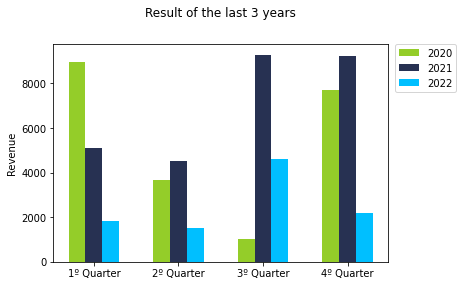

In [40]:
plt.bar(r1, revenue_2020, color='#94CD29', width=barWidth, label='2020')
plt.bar(r2, revenue_2021, color='#273152', width=barWidth, label='2021')
plt.bar(r3, revenue_2022, color='#00BFFF', width=barWidth, label='2022')

#plt.style.use('bmh')
plt.xticks([r + barWidth for r in range(len(revenue_2020))], ['1º Quarter', '2º Quarter', '3º Quarter', '4º Quarter'])
plt.ylabel('Revenue')
plt.title('Result of the last 3 years', x=0.5, y=1.1)

plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.show()
plt.savefig('result_last_3years.png', bbox_inches='tight')

In [41]:
revenue_acum = [sum(revenue_2020), sum(revenue_2021), sum(revenue_2022)]
revenue_acum

[21351, 28184, 10150]

In [42]:
year = date.today().year - 3 + revenue_acum.index(max(revenue_acum)) + 1 
year

2021

Transferindo para o Word e Salvando | Transferring to Word and Saving

In [43]:
context = {
    "tblSalesRows": salesRows,
    "texSalesTotal": sum(revenue_2022),
    "numTopSalesItem": topSalesItem,
    "betterYear": year,
    "resulBetterYear": round(sum(revenue_2022)/sum(revenue_acum)*100, 2),
    "grafico1": InlineImage(doc, 'result_last_3years.png')
}

In [44]:
doc.render(context)
doc.save('Annual Report - Genereted.docx')
convert("Annual Report - Genereted.docx") #Convertendo para PDF | Converting to PDF

100%|██████████| 1/1 [00:01<00:00,  1.73s/it]
